# DATA 620 - Week 3 Assignment: Graph Visualization

## Prompt
This week's assignment is to:

Load a graph dataset of your choosing from a text file or other source.  If you take a large network dataset from the web (such as from Stanford Large Network Dataset Collection), please feel free at this point to load just a small subset of the nodes and edges.

Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing.  You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package.

Use a visualization tool of your choice (NetworkX, Gephi, Pyvis, etc.) to display information.
Please record a short video (~ 5 minutes), and submit a link to the video in advance of our meet-up.
You may work in a small group on this project.  Parts one and two should be posted to GitHub and submitted in your assignment link by end of day Monday 9/16.



## Dataset

The World Happiness Report measures global happiness through surveys collected by the Gallup World Poll. Answers are then collected based on a Cantril ladder life question where participants are asked to think of lifestyles on a ladder, with their ideal and best possible life being at a 10, or the top of the ladder, and their worst possible life at a 0, or the very bottom of the ladder. They are then asked to rate their own lives on this scale along with six main observed factors that may contribute to their responses. These six factors are: economic production, social support, life expectancy, freedom, absence of corruption, and generosity.

This is the Kaggle link for the dataset: https://www.kaggle.com/datasets/unsdsn/world-happiness


## Reading the Dataset



For the purpose of this assignment, I have decided to work with the most recent data from this dataset. I have uploaded the 2019 data collected from the world happiness report to Github, and I started by reading the data from the raw data link. I also wanted to visualize only one of the six factors that were recorded from the world happiness report, so I decided to work with the 'Country or region' and 'Score' labels. I imported the necessary packages for this assignment as well. Here, I have included a dataframe of the data, followed by a dataframe of the two factors which we will be looking at throughout this assignment.

In [43]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/rkasa01/DATA620_Week3/main/archive/2019.csv"
df = pd.read_csv(url)
print("World Happiness Report Data")
print(df.head())

selected_columns = ['Country or region', 'Score']
df_score = df[selected_columns]
df_score = df_score.sort_values(by='Country or region')

print("Happiness Scores by Country or Region")
print(df_score.head())

World Happiness Report Data
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                   

 I wanted to begin by at the dataset by printing the first five rows, to help get a better sense of what we are working with. We see that the 'Country or region' column is displayed in alphabetical order, next to the 'Score' column, which represents the Cantril Life Ladder score, or the happiness score.

## Data Visualization

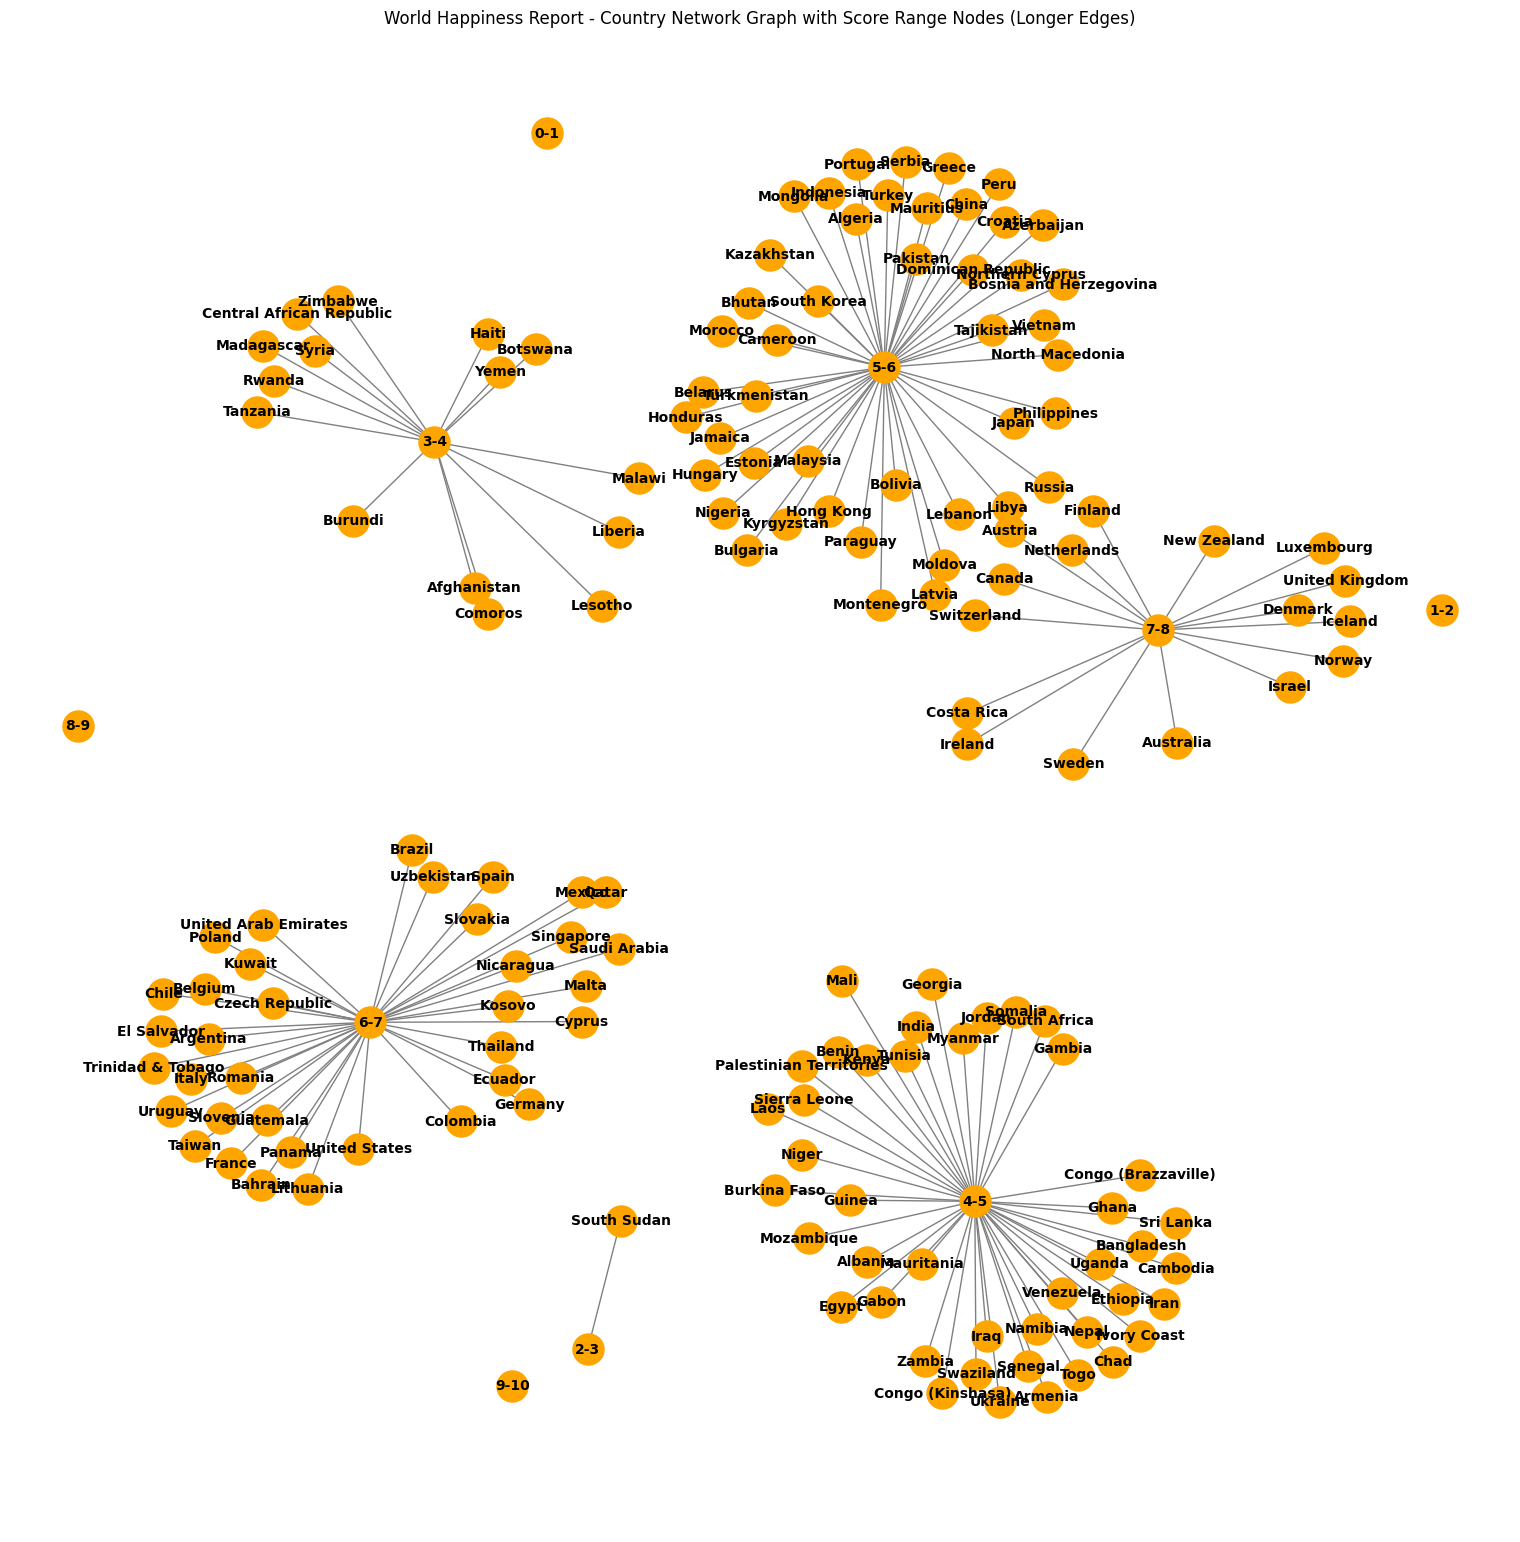

In [62]:
G = nx.Graph()

for score_range in range(10): # 0-1, 1-2, etc
    G.add_node(f'{score_range}-{score_range + 1}')

for index, row in df_score.iterrows():
    score_range = int(row['Score'])
    G.add_node(row['Country or region'])
    G.add_edge(row['Country or region'], f'{score_range}-{score_range + 1}')

pos = nx.spring_layout(G, seed=42, k=0.22)  # k adjusts length

label_y_offset = -0.05

plt.figure(figsize=(15, 15))

nx.draw(G, pos, with_labels=True, node_size=500, node_color='orange', font_size=10, font_color='black', font_weight='bold', edge_color='gray')

plt.title('World Happiness Report - Country Network Graph with Score Range Nodes (Longer Edges)')
plt.show()


Because of the number of countries recorded in this dataset, I had to experiment with several formats and shapes before deciding how to best display the nodes. I started by making a graph, and assigning 10 node values between 1-10. I decided it was best to make these values ranges, such as 0-1, 1-2, 2-3, 3-4, 4-5, 5-6, 6-7, 7-8, 8-9, and 9-10. I did this to group the countries with similar happiness scores, and to avoiding drastically changing any values by rounding up or down. I attempted to optimize the space I had in this figure as best as I could by manipulating the size of the font, the edge length, the node diameter, and the placement and order of the nodes. We can see clearly that there are no countries with a happiness score above 8, and that there are also no countries with a happiness score below 2.

## Conclusion

Ultimately, I am very satisified with how the final graph turned out. As I continue to improve my skills with networkx, I will be able to also improve my graphic abilities. Overall, I find this graph to be very effective in displaying the data, and giving us an idea of which countries run in similar circles. Data like this can give us ideas as to how we can begin to improve the world around us.